In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [2]:
data = pd.read_csv("Advertising.csv")

In [4]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


we can see that there are 3 indepedent features and to increase the sale in what medium like Tv, Radio, Newspaper we have to do the advertisment

In [5]:
data.shape

(200, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [9]:
data.isna().sum() # seeing if there are any null values in the columns

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

Now let's see and find the relationships between Sales vs TV, Sales vs Radio, Sales vs Newspapers using a scatter plot

<Axes: xlabel='newspaper', ylabel='sales'>

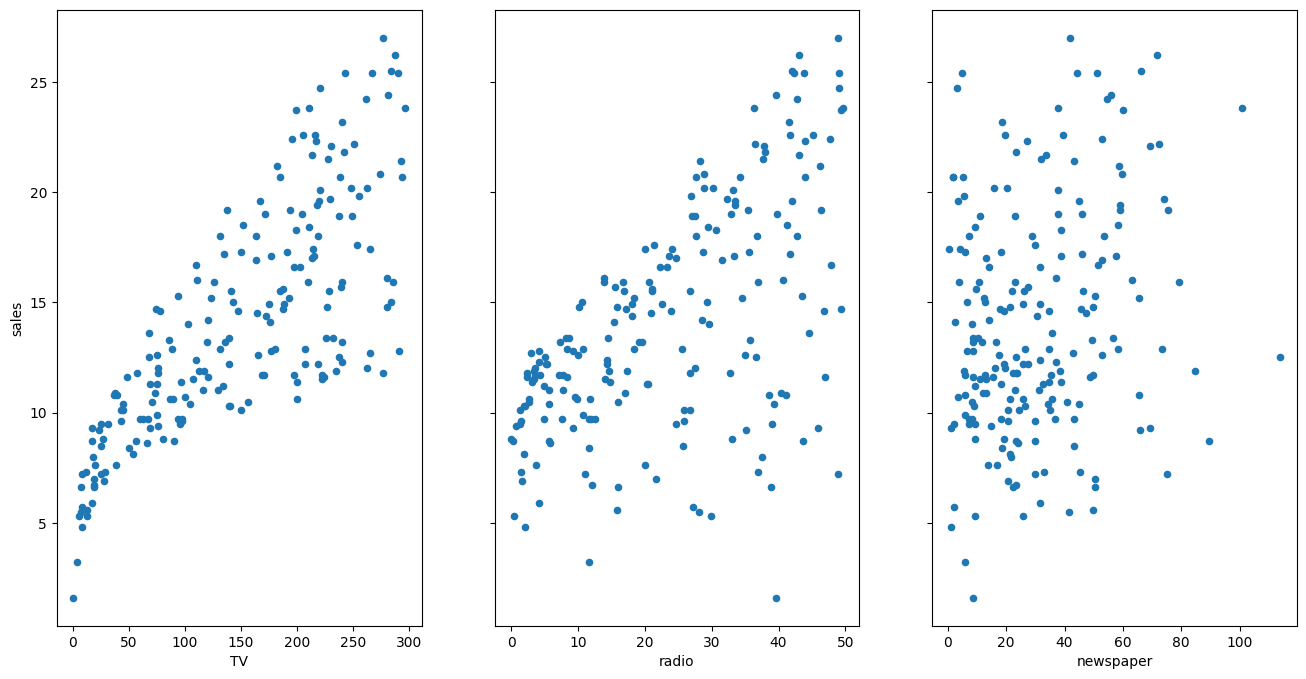

In [18]:
fig, axs = plt.subplots(1,3,sharey=True) # this line makes sure that the graphs must be in 1 rows and 3 columns
data.plot(kind='scatter',x='TV',y='sales',ax=axs[0],figsize=(16,8))
data.plot(kind='scatter',x='radio',y='sales',ax=axs[1],figsize=(16,8))
data.plot(kind='scatter',x='newspaper',y='sales',ax=axs[2],figsize=(16,8))

#### we can see that in the sales vs TV graph that when the amount spend on Tv advertisements increse then the sales are also increasing, and in the second graph it is not clear that if the spend on radio increses then sales as increasing or not because the data is scattered, in the third graph we can see that the sales are increasing until a certain amount spend after that there is not much increse.